https://pbpython.com/effective-matplotlib.html

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [4]:
df.shape

(1500, 7)

In [9]:
# number of purchases and total sales for the top 10 customers
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [10]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [11]:
# tipos de graficos
plt.style.available

['Solarize_Light2',
 'seaborn-bright',
 'seaborn-colorblind',
 'dark_background',
 'tableau-colorblind10',
 'seaborn-whitegrid',
 'seaborn-white',
 'fast',
 'seaborn-deep',
 'grayscale',
 'bmh',
 '_classic_test',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-dark',
 'seaborn',
 'seaborn-poster',
 'seaborn-talk',
 'fivethirtyeight',
 'classic',
 'seaborn-darkgrid',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-paper',
 'seaborn-notebook',
 'seaborn-pastel']

In [12]:
# define o tipo de grafico
plt.style.use('ggplot')


In [13]:
type(top_10)

pandas.core.frame.DataFrame

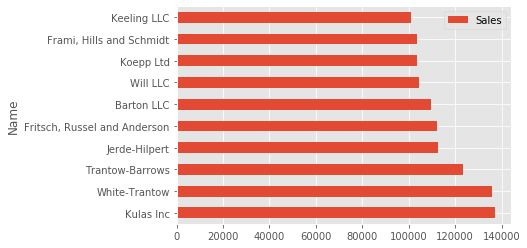

In [18]:
# I recommend using pandas plotting first
top_10.plot(kind='barh', y="Sales", x="Name")

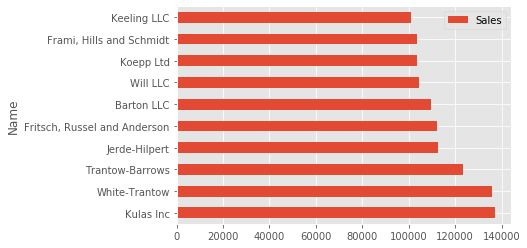

In [20]:
top_10.plot(kind='barh', x="Name", y="Sales")

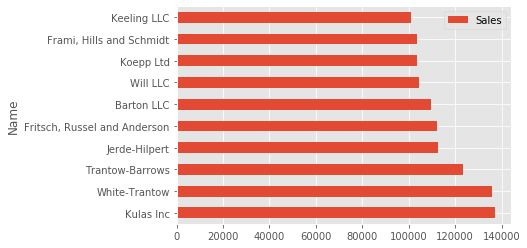

In [21]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

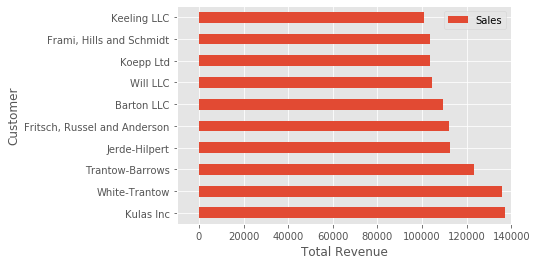

In [22]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
# aumenta o limite do eixo numero y sales
ax.set_xlim([-10000, 140000]) 
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

[Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

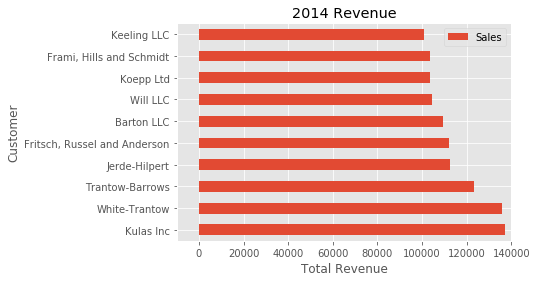

In [23]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

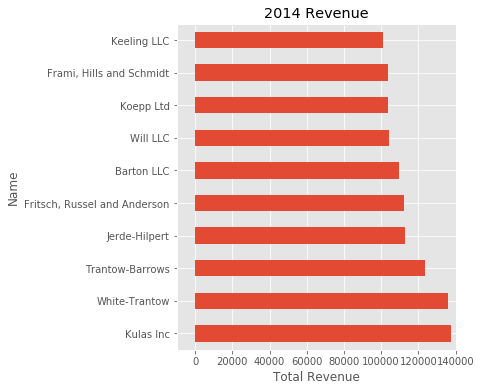

In [26]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

In [27]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

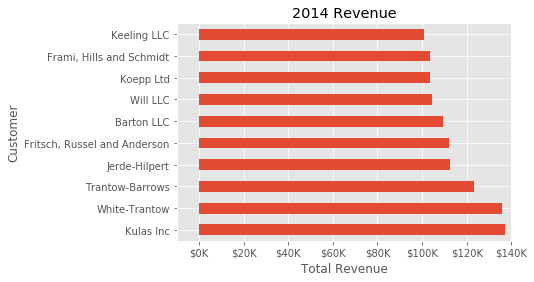

In [28]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)  # formata os numeros de 10.000 para 10K
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

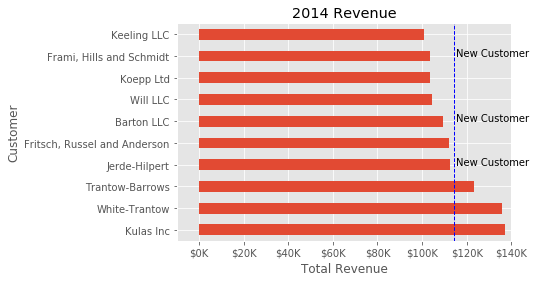

In [29]:
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

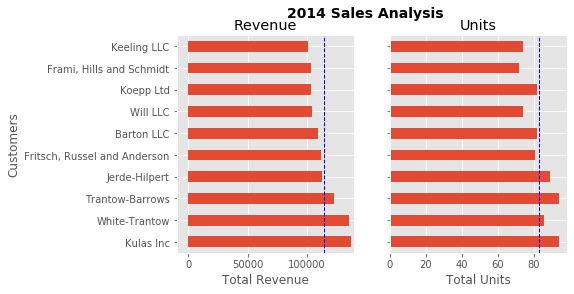

In [30]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

In [32]:
# tipo de dados que o matplotlib suporta para salvar
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [34]:
# salva a imagem localmente
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

https://matplotlib.org/tutorials/introductory/lifecycle.html

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

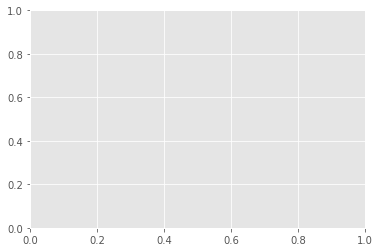

In [39]:
fig, ax = plt.subplots()

<BarContainer object of 10 artists>

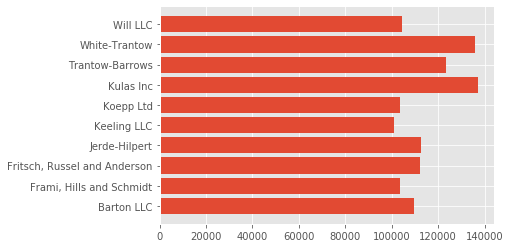

In [40]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)


In [41]:
plt.style.use('fivethirtyeight')

<BarContainer object of 10 artists>

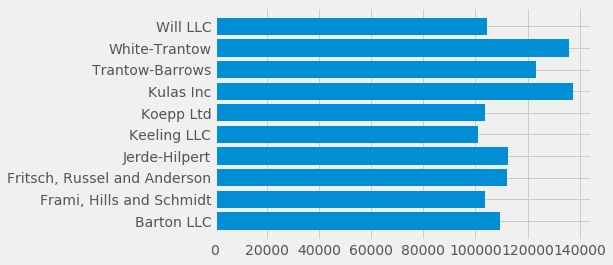

In [42]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

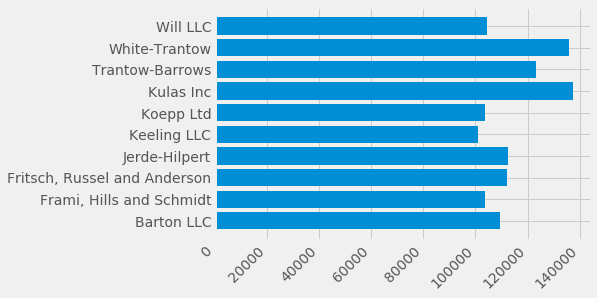

In [47]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

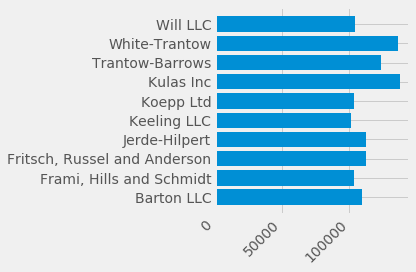

In [48]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

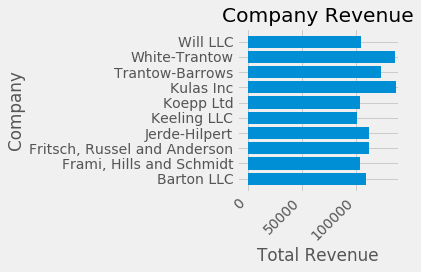

In [49]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

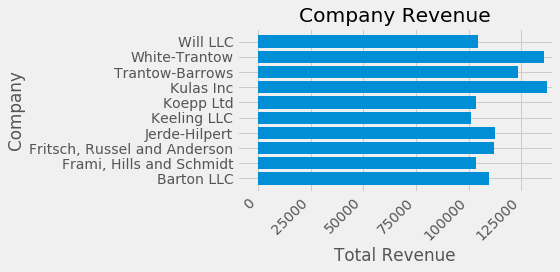

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

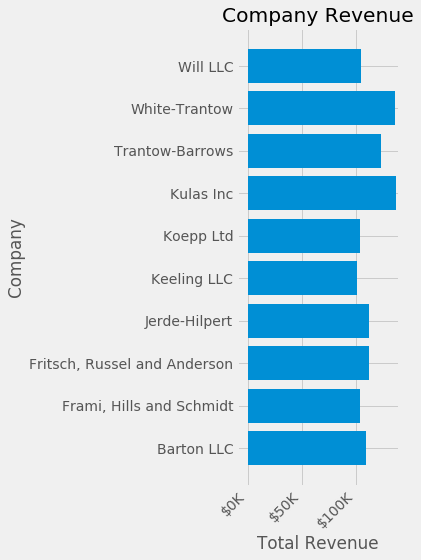

In [51]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

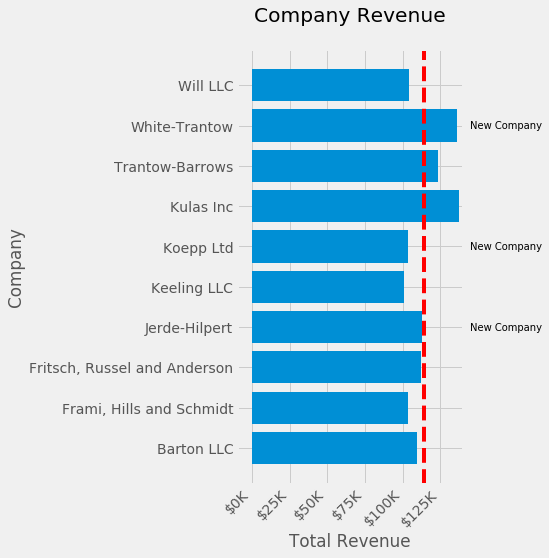

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()